In [1]:
import pandas as pd
import sqlite3 as sql
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, f_oneway
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
# Set seaborn style for plots
sns.set(style='whitegrid')

In [29]:
conn = sql.connect('C:/Users/Adekoyejo.dada/Desktop/3signet/Database_Link/adventure_works_db.db', check_same_thread=False)
cursor = conn.cursor()

In [4]:
# Define a function to run SQL queries and return DataFrame
def run_query(query): return pd.read_sql_query(query, conn)

In [5]:
query = ''' select ProductCategoryKey, ProductPrice, SUM(OrderQuantity) AS TotalQuantity
FROM Merged_AdventureWorks_Data_ProductsandAdventureWorks_Product_Subcategories
group by ProductCategoryKey
'''

In [7]:
price_quantity_data = run_query(query)

In [8]:
# Calculate the Pearson correlation between ListPrice and TotalQuantity
correlation, p_value = pearsonr(price_quantity_data['ProductPrice'], price_quantity_data['TotalQuantity'])
print(f"Pearson Correlation: {correlation: .4f}, p-value: {p_value:.4f}")

Pearson Correlation: -0.5185, p-value: 0.6530


In [9]:
# Interpret correlation result
if p_value < 0.05:
    print("There is a statistically significant correlation between price and quantity.")
else:
    print("There is no statistically significant correlation between price and quantity.")

There is no statistically significant correlation between price and quantity.


In [10]:
x = price_quantity_data[['ProductPrice']]
y= price_quantity_data['TotalQuantity']
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [11]:
# Regresion coefficients
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

Intercept: 36747.416058621864
Slope: -34.47471872632759


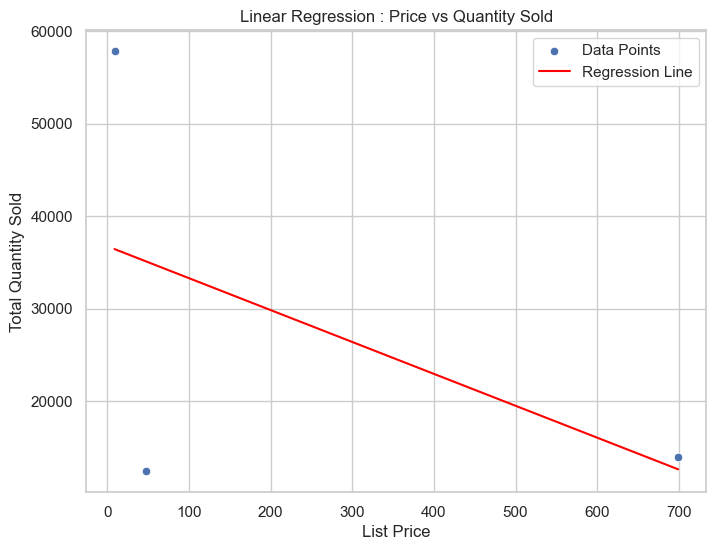

In [12]:
# Predict values and plot the regression line
plt.figure(figsize = (8, 6))
sns.scatterplot(x='ProductPrice', y='TotalQuantity', data=price_quantity_data, label='Data Points')
plt.plot(price_quantity_data['ProductPrice'], model.predict(x), color = 'red', label='Regression Line')
plt.title('Linear Regression : Price vs Quantity Sold')
plt.xlabel('List Price')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.show()

# ADVANCED STATISTICAL ANALYSIS

In [13]:
# Define a function to run SQL queries and return DataFrame
def run_query(query): return pd.read_sql_query(query, conn)

In [16]:
query = '''
SELECT TerritoryKey, Region, SUM(OrderQuantity) AS TotalSales
FROM JoinedSalesTerritory
GROUP BY TerritoryKey
'''

In [17]:
territory_sales_data = run_query(query)

In [18]:
territory_sales_data.head()

,TerritoryKey,Region,TotalSales
0,1,Northwest,12513
1,2,Northeast,40
2,3,Central,30
3,4,Southwest,17191
4,5,Southeast,49


In [19]:
# Import relevant libraries for hypothesis testing

In [20]:
from scipy.stats import f_oneway
import statsmodels.stats.multicomp as mc

In [21]:
# Perform ANOVA test
territory_groups = [territory_sales_data[territory_sales_data['TerritoryKey'] ==tid]['TotalSales'] for tid in territory_sales_data['TerritoryKey'].unique()]
anova_result = f_oneway(*territory_groups)
print(f"ANOVA F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}")

ANOVA F-statistic: nan, p-value: nan


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


In [23]:
# Check data count due to confirm size of samples
for tid in territory_sales_data['TerritoryKey'].unique():
    sales_data = territory_sales_data[territory_sales_data['TerritoryKey'] == tid]['TotalSales']
    print(f"TerritoryKey: {tid}, Data Count: {len(sales_data)}")


TerritoryKey: 1, Data Count: 1
TerritoryKey: 2, Data Count: 1
TerritoryKey: 3, Data Count: 1
TerritoryKey: 4, Data Count: 1
TerritoryKey: 5, Data Count: 1
TerritoryKey: 6, Data Count: 1
TerritoryKey: 7, Data Count: 1
TerritoryKey: 8, Data Count: 1
TerritoryKey: 9, Data Count: 1
TerritoryKey: 10, Data Count: 1


In [24]:
# Filter territories with more than one data point(if applicable) and Perfprm Kruskal-Wallis Test
from scipy.stats import kruskal

territory_groups = [territory_sales_data[territory_sales_data['TerritoryKey'] == tid]['TotalSales'] 
                    for tid in territory_sales_data['TerritoryKey'].unique()]
kruskal_result = kruskal(*territory_groups)
print(f"Kruskal-Wallis H-statistic: {kruskal_result.statistic:.4f}, p-value: {kruskal_result.pvalue:.4f}")


Kruskal-Wallis H-statistic: 9.0000, p-value: 0.4373


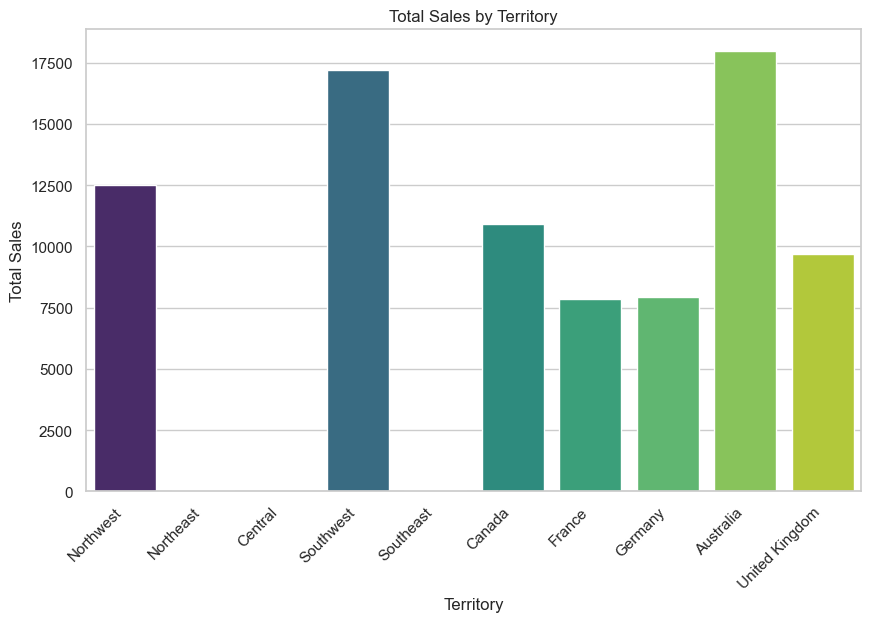

In [26]:
# Plotting bar plot for the data due to small sample size
plt.figure(figsize=(10, 6))
sns.barplot(data=territory_sales_data, x='Region', y='TotalSales', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Total Sales by Territory')
plt.xlabel('Territory')
plt.ylabel('Total Sales')
plt.show()

# Bar plot showing variations in sales across territories with Australia showing the highest sales and US Northeast and Central at the bottom of the sales hierarchy

# INTEPRET STATISTICAL RESULTS

In [27]:
def run_query(query): 
    return pd.read_sql_query(query,conn)

In [31]:
query = '''
SELECT CategoryName, OrderDate, SUM(OrderQuantity) AS TotalSales
FROM CategoryTable
GROUP BY CategoryName, OrderDate
ORDER BY OrderDate
'''
category_sales_data = run_query(query)
category_sales_data['OrderDate'] = pd.to_datetime(category_sales_data['OrderDate'])


In [32]:
category_sales_data.head()

,CategoryName,OrderDate,TotalSales
0,Bikes,2016-01-01,24
1,Accessories,2017-01-01,1464
2,Bikes,2017-01-01,45
3,Clothing,2017-01-01,144
4,Bikes,2016-01-02,36


In [33]:
print(category_sales_data)

     CategoryName  OrderDate  TotalSales
0           Bikes 2016-01-01          24
1     Accessories 2017-01-01        1464
2           Bikes 2017-01-01          45
3        Clothing 2017-01-01         144
4           Bikes 2016-01-02          36
...           ...        ...         ...
1636        Bikes 2015-09-05           9
1637        Bikes 2015-09-06          12
1638        Bikes 2015-09-07           6
1639        Bikes 2015-09-08          27
1640        Bikes 2015-09-09          27

[1641 rows x 3 columns]


In [34]:
# Create new column for 'Month'
category_sales_data['Month'] = category_sales_data['OrderDate'].dt.strftime('%B')

In [35]:
print(category_sales_data)

     CategoryName  OrderDate  TotalSales      Month
0           Bikes 2016-01-01          24    January
1     Accessories 2017-01-01        1464    January
2           Bikes 2017-01-01          45    January
3        Clothing 2017-01-01         144    January
4           Bikes 2016-01-02          36    January
...           ...        ...         ...        ...
1636        Bikes 2015-09-05           9  September
1637        Bikes 2015-09-06          12  September
1638        Bikes 2015-09-07           6  September
1639        Bikes 2015-09-08          27  September
1640        Bikes 2015-09-09          27  September

[1641 rows x 4 columns]


In [36]:
# Define order of month for proper sorting
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

In [37]:
# Convert 'Month' to categorical with ordered months
category_sales_data['Month'] = pd.Categorical(
    category_sales_data['Month'], categories=month_order, ordered=True
)


In [39]:
# Group DataFrame by 'Month'
category_sales = category_sales_data.groupby(['Month', 'CategoryName'])['TotalSales'].sum().reset_index()

In [41]:
# Sort DataFrame by 'Month'
category_sales = category_sales.sort_values('Month')

In [42]:
print(category_sales.head())

      Month CategoryName  TotalSales
0   January  Accessories       61704
1   January        Bikes        3576
2   January     Clothing        8896
3  February  Accessories       59064
4  February        Bikes        3714


<Figure size 1200x800 with 0 Axes>

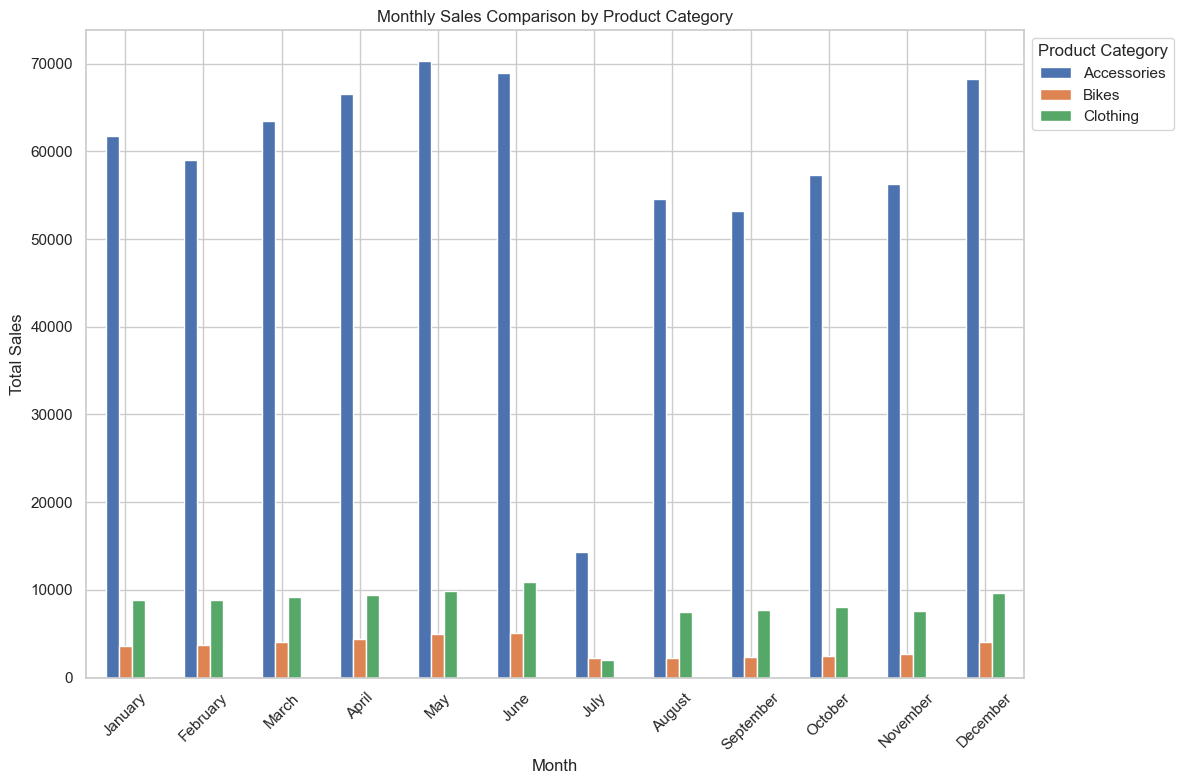

In [45]:
# Plot bar chart to better make sense of data
plt.figure(figsize=(12, 8))
category_pivot = category_sales_data.pivot_table(values='TotalSales', index='Month', columns='CategoryName', aggfunc='sum')
category_pivot.plot(kind='bar', figsize=(12, 8))
plt.title('Monthly Sales Comparison by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf


In [48]:
# Perform time series decompostiton for a selscted category for 'Bikes'
category = 'Bikes'
category_data = category_sales_data[category_sales_data['CategoryName'] == category].set_index('Month')
decompose_result = seasonal_decompose(category_data['TotalSales'], model='additive', period=12)


C:\Users\Adekoyejo.dada\AppData\Local\Temp\ipykernel_25540\277502586.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title


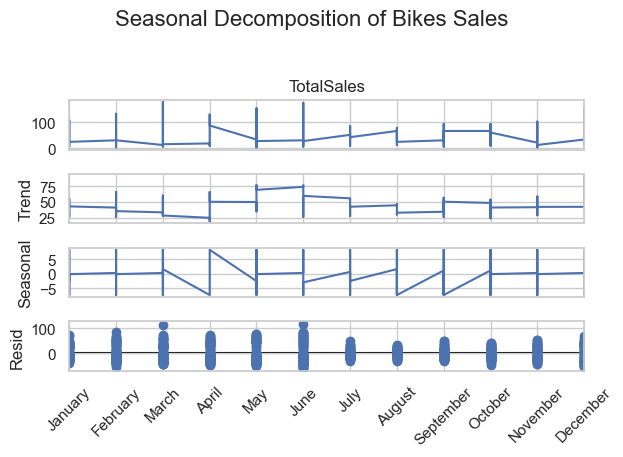

In [49]:
# Plot decomposition results
decompose_result.plot()
plt.suptitle(f'Seasonal Decomposition of {category} Sales', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

C:\Users\Adekoyejo.dada\AppData\Local\Temp\ipykernel_25540\2172695234.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title


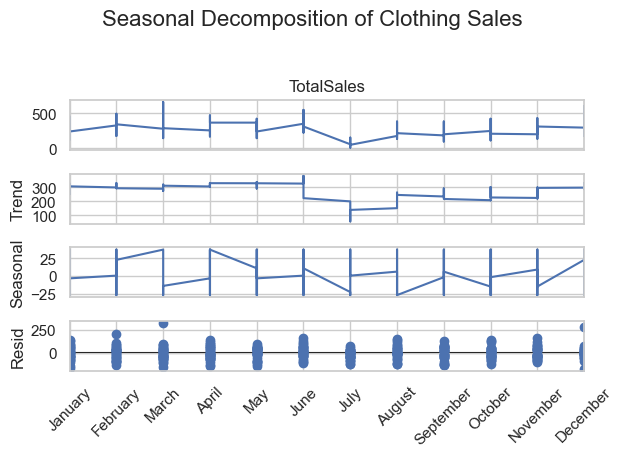

In [52]:
# Perform time series decompostiton for a selscted category for 'Clothing'
category = 'Clothing'
category_data = category_sales_data[category_sales_data['CategoryName'] == category].set_index('Month')
decompose_result = seasonal_decompose(category_data['TotalSales'], model='additive', period=12)
# Plot decomposition results
decompose_result.plot()
plt.suptitle(f'Seasonal Decomposition of {category} Sales', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

In [53]:
# Perform time series decompostiton for a selscted category for 'Clothing'
category = 'Accessories'
category_data = category_sales_data[category_sales_data['CategoryName'] == category].set_index('Month')
decompose_result = seasonal_decompose(category_data['TotalSales'], model='additive', period=12)


C:\Users\Adekoyejo.dada\AppData\Local\Temp\ipykernel_25540\277502586.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title


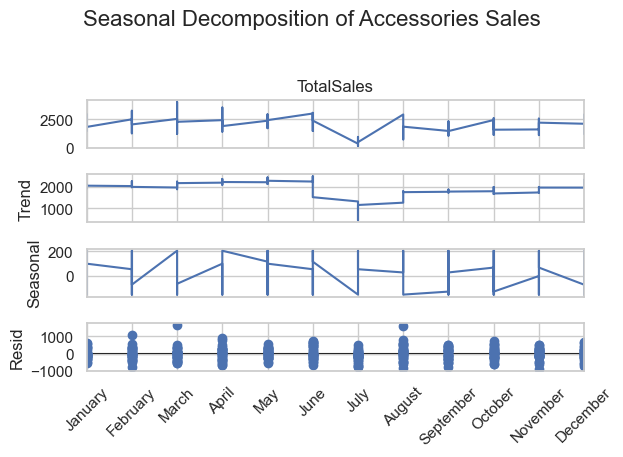

In [54]:
# Plot decomposition results
decompose_result.plot()
plt.suptitle(f'Seasonal Decomposition of {category} Sales', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

In [55]:
# Time series regression analysis to test sesonal effect

model = smf.ols('TotalSales ~ C(Month)', data=category_sales_data[category_sales_data['CategoryName'] == category]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalSales   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     53.85
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.01e-68
Time:                        06:51:56   Log-Likelihood:                -2672.6
No. Observations:                 365   AIC:                             5369.
Df Residuals:                     353   BIC:                             5416.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1990.45

In [56]:
conn.close()